Name       :  __Indla Sunil__

Heroku URL : https://my-recommendation-system.herokuapp.com/

# Problem Statement

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

In order to do this, We planned to build a __sentiment-based product recommendation system__

__sentiment analysis :__

In this task, you have to analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products. 

We have to use any four algorith and find the best one

Out of these four models, you need to select one classification model based on its performance.



__Building a recommendation system :__

We can use the following types of recommendation systems.

1. User-based recommendation system

2. Item-based recommendation system

Your task is to analyse the recommendation systems and select the one that is best suited in this case. 

 

Once you get the best-suited recommendation system, the next task is to recommend 20 products that a user is most likely to purchase based on the ratings.

# Improving the recommendations using the sentiment analysis model

Now, the next task is to link this recommendation system with the sentiment analysis model that was built earlier (recall that we asked you to select one ML model out of the four options). Once you recommend 20 products to a particular user using the recommendation engine, you need to filter out the 5 best products based on the sentiments of the 20 recommended product reviews. 



In [190]:
#importing required Libraries
import pandas as pd 
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes  import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import pickle
import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [191]:
# reading the csv file

# Path variable to hold the specific path of the data
path="/content/sample30.csv" # Replace with correct path variable
feedback=pd.read_csv(path)

##### Understanding the dataset and it's attributes

In [192]:
#checking first 5 records 
feedback.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [193]:
#checking shape of the data set
feedback.shape

(30000, 15)

In [194]:
feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [195]:
feedback.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

# Data cleaning

In [196]:
feedback.columns

Index(['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date',
       'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating',
       'reviews_text', 'reviews_title', 'reviews_userCity',
       'reviews_userProvince', 'reviews_username', 'user_sentiment'],
      dtype='object')

In [197]:
#as below columns are enough of sentiment analysis 
feed=feedback[["name","reviews_title","reviews_text","user_sentiment"]]

In [198]:
feed.shape

(30000, 4)

reviews_title and reviews_text both has text data needed for analysis so we are combining both columns 

In [199]:

feed['full_text']=feed["reviews_title"]+" "+feed["reviews_text"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [200]:
feed.head(5)

,name,reviews_title,reviews_text,user_sentiment,full_text
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome,i love this album. it's very good. more to the...,Positive,Just Awesome i love this album. it's very good...
1,Lundberg Organic Cinnamon Toast Rice Cakes,Good,Good flavor. This review was collected as part...,Positive,Good Good flavor. This review was collected as...
2,Lundberg Organic Cinnamon Toast Rice Cakes,Good,Good flavor.,Positive,Good Good flavor.
3,K-Y Love Sensuality Pleasure Gel,Disappointed,I read through the reviews on here before look...,Negative,Disappointed I read through the reviews on her...
4,K-Y Love Sensuality Pleasure Gel,Irritation,My husband bought this gel for us. The gel cau...,Negative,Irritation My husband bought this gel for us. ...



Handling missing values in categorical attributes

In [201]:
#checking the percentage of missing values 
round(100*feed.isnull().sum()/len(feed),2)

name              0.00
reviews_title     0.63
reviews_text      0.00
user_sentiment    0.00
full_text         0.63
dtype: float64

In [202]:
#droping the columns which has missing values
feed.dropna(axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [203]:
#checking the count of the dependent variable
feed.user_sentiment.value_counts()


Positive    26464
Negative     3345
Name: user_sentiment, dtype: int64

From the above value we could see Positive class is having more data points compair to negative data points, this is called imbalance in the class

In [204]:
#checking percentage of data having negative class 
check_imbalance=feed.user_sentiment.value_counts()
check_imbalance
print("in the given data set we have Negative reviews of %",(check_imbalance[1]/check_imbalance[0])*100)

in the given data set we have Negative reviews of % 12.639812575574366


In [205]:
# encoding the output classes with number 
# positive as "1" and Negative as "0"
feed['label']=feed.user_sentiment.map({"Positive":1,"Negative":0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [206]:
feed['label']=feed['label'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [207]:
# droping the columns which are not needed
feed.drop(columns=['reviews_title','reviews_text','user_sentiment'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [208]:
feed.head(2)

,name,full_text,label
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome i love this album. it's very good...,1
1,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor. This review was collected as...,1


In [209]:
feed.shape

(29809, 3)

**Below is the function used for text processing and it contains these process**

1.extracting only Alpha characters

2.converting to lower case

3.Removing stop words

4.Doing Lematation 

In [210]:

def process_text(text):
    text=re.sub('[^a-zA-Z ]','',text)
    text=text.lower()
    text=text.split(" ")
    text=[WordNetLemmatizer().lemmatize(word) for word in text if word not in set(stopwords.words('english')) ]
    text=' '.join(text)
    return text

In [211]:
feed.head(2)

,name,full_text,label
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome i love this album. it's very good...,1
1,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor. This review was collected as...,1


In [212]:
#applying the text processing and storing in new column
feed['processed_text']=feed['full_text'].apply(lambda x:process_text(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [213]:
feed.head(2)

,name,full_text,label,processed_text
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome i love this album. it's very good...,1,awesome love album good hip hop side current p...
1,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor. This review was collected as...,1,good good flavor review collected part promotion


### EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


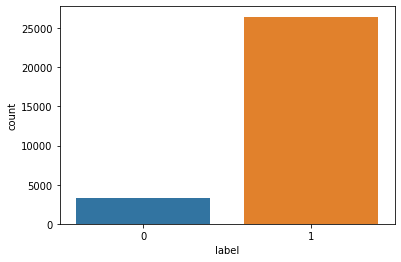

In [214]:
sns.countplot(feed['label'])

We can see that label 1 is having more data than label 0.
We will hable the class imbalance and make the data balance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

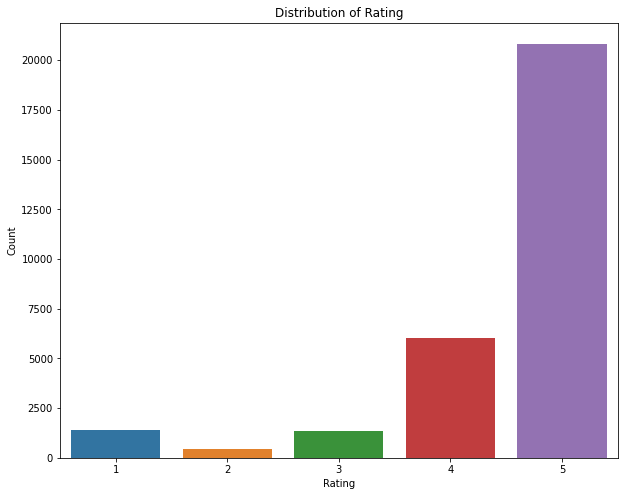

In [215]:
# Plot distribution of rating
plt.figure(figsize=(10,8))
sns.countplot(feedback["reviews_rating"])
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


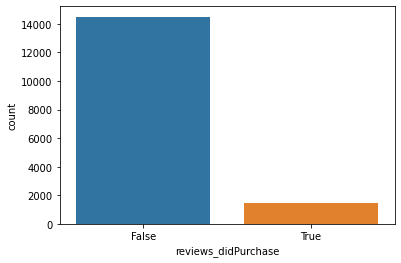

In [216]:
sns.countplot(feedback["reviews_didPurchase"])

Text(0, 0.5, 'Count')

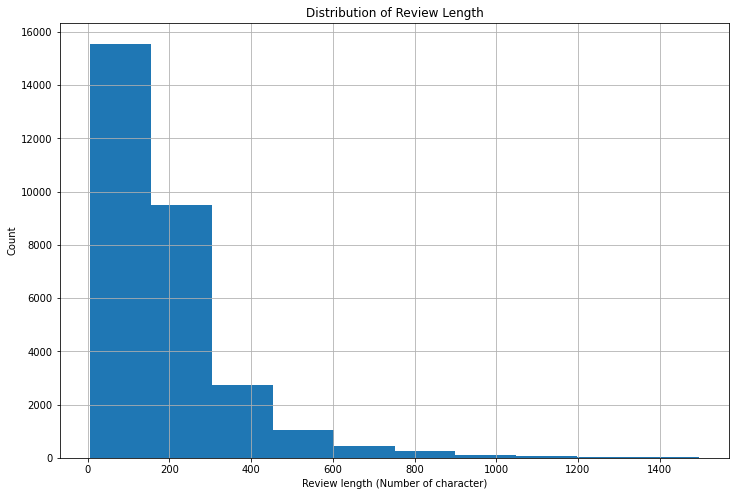

In [217]:

# Plot distribution of review length
review_length = feed["full_text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [218]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
    background_color = 'black',
    stopwords=stopwords,
    max_words=100,
    max_font_size=40,
    scale=3,
    random_state=1 #choose at random
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top = 2.3)
        
    plt.imshow(wordcloud)
    plt.show()
    

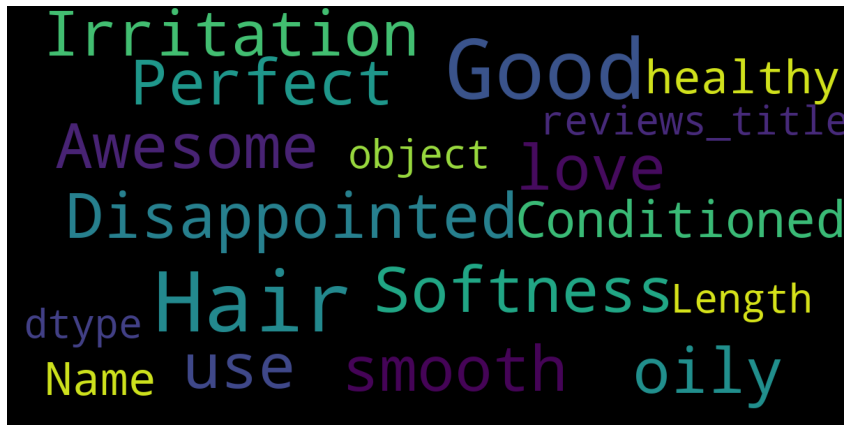

In [219]:
#most important word from the reviews_title
show_wordcloud(feedback['reviews_title'])

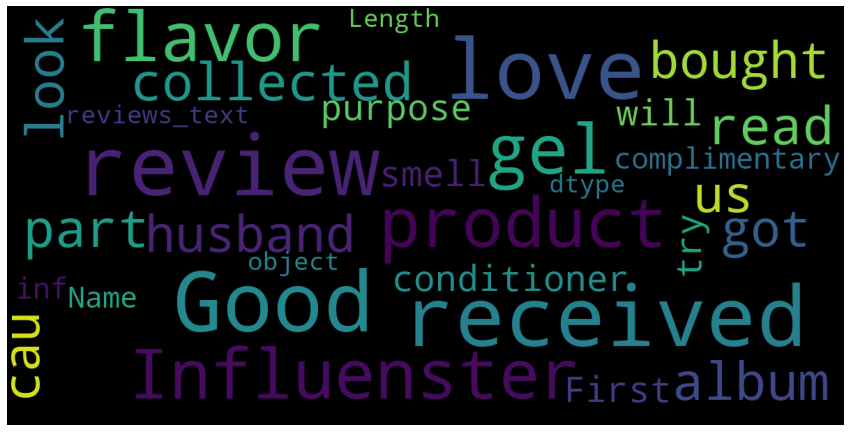

In [220]:
#most important word from the reviews_text
show_wordcloud(feedback['reviews_text'])

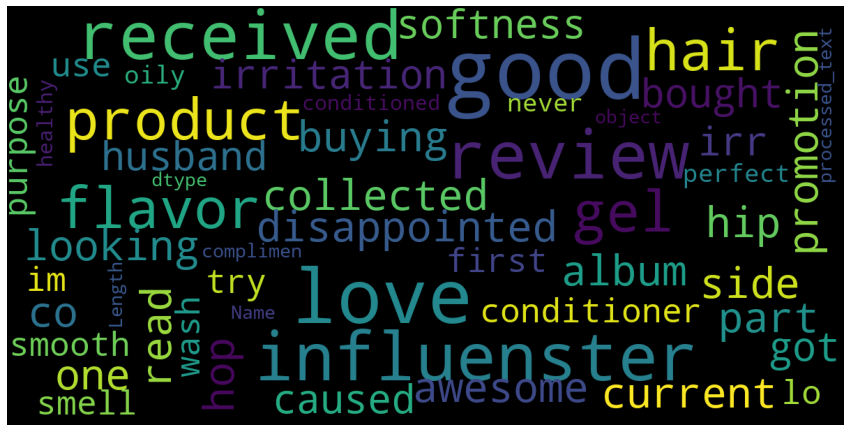

In [221]:
#most important word from the from reviews_title and  reviews_text, after text processing
show_wordcloud(feed['processed_text'])

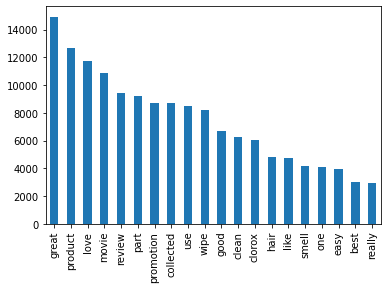

In [222]:
#Ploting the count of the most frequent used top 20 words
dfText = feed['processed_text'].str.split(expand=True).stack().value_counts()
dfText[:20].plot.bar()

# Model Building 

In [223]:
feed.head()

,name,full_text,label,processed_text
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome i love this album. it's very good...,1,awesome love album good hip hop side current p...
1,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor. This review was collected as...,1,good good flavor review collected part promotion
2,Lundberg Organic Cinnamon Toast Rice Cakes,Good Good flavor.,1,good good flavor
3,K-Y Love Sensuality Pleasure Gel,Disappointed I read through the reviews on her...,0,disappointed read review looking buying one co...
4,K-Y Love Sensuality Pleasure Gel,Irritation My husband bought this gel for us. ...,0,irritation husband bought gel u gel caused irr...


In [224]:
#Storing the Product name and processed text in csv file for using it in Flask
sample_data_processed=feed[['name','processed_text']]
sample_data_processed.to_csv('sample30_processed.csv')

 I tried to write the same text processing function which used above, in flask also, but it is taking long time to process the text,So i stored the processed text in csv and using that csv in flask, taking processed text columns data for respective product  and using for TFID transform.

Data Splitting

In [225]:
# Getting independent variables and output variable
X=feed['processed_text']
Y=feed['label']

In [226]:
X[0:2]

0    awesome love album good hip hop side current p...
1     good good flavor review collected part promotion
Name: processed_text, dtype: object

In [227]:
Y[0:1]

0    1
Name: label, dtype: int64

## Handling Data Class Imbalance
We are using SMOTE algorithm to handle the imbalance.
**SMOTE (Synthetic Minority Oversampling Technique) � Oversampling** SMOTE is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

In [228]:
#function used to handle imbalance
def handleImblance(X,Y):
  print(' the shape of train_X: {}'.format(X.shape))
  print('the shape of train_y: {} \n'.format(Y.shape))

  print(" counts of label '1': {}".format(sum(Y == 1)))
  print(" counts of label '0': {} \n".format(sum(Y == 0)))
  print(" Positive sentiment rate : {}% \n".format(round(sum(Y == 1)/len(Y)*100,2)))
  print(" Negative sentiment rate : {}% \n".format(round(sum(Y == 0)/len(Y)*100,2)))
  sm = SMOTE(random_state = 2)
  X, Y = sm.fit_sample(X, Y)
  print('After OverSampling, the shape of train_X: {}'.format(X.shape))
  print('After OverSampling, the shape of train_y: {} \n'.format(Y.shape))

  print("After OverSampling, counts of label '1': {}".format(sum(Y == 1)))
  print("After OverSampling, counts of label '0': {} \n".format(sum(Y == 0)))
  print("After OverSampling, Positive sentiment rate : {}% \n".format(round(sum(Y == 1)/len(Y)*100,2)))
  print("After OverSampling, Negative sentiment rate : {}% \n".format(round(sum(Y == 0)/len(Y)*100,2)))
  return X,Y

In [229]:
# converting text data into TFID vector
tfid=TfidfVectorizer(max_features=5000)
X_TFID=tfid.fit_transform(X).toarray()

In [230]:
# Saving model to disk
pickle.dump(tfid, open('tfid.pkl','wb'))

In [231]:
#We are over sampling the data to handle inmabalnce
X_TFID,Y_TFID=handleImblance(X_TFID,Y)

 the shape of train_X: (29809, 5000)
the shape of train_y: (29809,) 

 counts of label '1': 26464
 counts of label '0': 3345 

 Positive sentiment rate : 88.78% 

 Negative sentiment rate : 11.22% 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (52928, 5000)
After OverSampling, the shape of train_y: (52928,) 

After OverSampling, counts of label '1': 26464
After OverSampling, counts of label '0': 26464 

After OverSampling, Positive sentiment rate : 50.0% 

After OverSampling, Negative sentiment rate : 50.0% 



In [232]:
X_TFID.shape

(52928, 5000)

In [233]:
# Splitting the data into train and test datasets
x_train_tfid,x_test_tfid,y_train_tfid,y_test_tfid=train_test_split(X_TFID,Y_TFID,train_size=0.7,test_size=0.3,random_state =100)

In [234]:
from sklearn.naive_bayes  import MultinomialNB

In [235]:
# Method to get evaluation metrics
def getModelEvaluationMetrics(actual, predicted,pre_prob):

    # Getting the confusion matrix
    confusion = metrics.confusion_matrix(actual, predicted)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    #accuracy
    print("accuracy: {}".format(metrics.accuracy_score(actual,predicted)))

    # ROC
    print("ROC - Area under the Curve Score : {}".format(metrics.roc_auc_score(actual,pre_prob)))
    
    # Sensitivity or Recall
    print('Sensitivity/Recall : {}'.format(TP / float(TP + FN)))
    
    # Specificity
    print('Specificity: {}'.format(TN / float(TN + FP)))
    
    # False Positive Rate 
    print('False Positive Rate: {}'.format(FP/ float(TN + FP)))
    
    # Positive Predictive Rate
    print('Positive predictive value: {}'.format(TP / float(TP + FP)))
    
    # Negative predictive Rate
    print('Negative Predictive value: {}'.format(TN / float(TN + FN)))
    
    # sklearn Precision score value
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual, predicted )))
    
    # sklearn Recall value
    print("RECALL SCORE :", metrics.recall_score(actual, predicted))

    # sklearn F1 score
    print("F1 SCORE :",metrics.f1_score(actual, predicted))

In [236]:
#function used for ploting confusion matrix
def plotConfusionMatrics(actual, predicted):
  plt.figure(dpi=100)
  mat = metrics.confusion_matrix(actual,predicted)
  sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)
  plt.title('Confusion Matrix for Naive Bayes')
  plt.xlabel('true label')
  plt.ylabel('predicted label')
  plt.show()

In [237]:

# Method to Plot ROC Curve
def plotROCCurve(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs)
    
    plt.figure(figsize = (15, 8))
    plt.plot( fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc = "lower right")
    plt.show()
    
    return fpr, tpr, thresholds

In [238]:
#function to fit the model
def modelfit(model,x_train,y_train,perform_cv= True, cv_folds=3):
  model.fit(x_train,y_train)
  dtrain_predictions=model.predict(x_train)
  dtrain_predprob=model.predict_proba(x_train)[:,1]
  #accuracy
  print("accuracy: {}".format(metrics.accuracy_score(y_train,dtrain_predictions)))
  
  if perform_cv:
    cv_score=cross_val_score(model,x_train,y_train,cv=cv_folds,scoring = 'roc_auc')

    
  if perform_cv:
    print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
      
        

In [239]:
# Model fitting
def trainEvaluationMetrics(model, X_train, y_train):
    # Fit the model on the data
    #model.fit(X_train, y_train)

    # Predict training set:
    dtrain_predictions = model.predict(X_train)
    dtrain_predprob = model.predict_proba(X_train)[:,1]

    # Getting the confusion matrix
    confusion = metrics.confusion_matrix(y_train, dtrain_predictions)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
        
    
    
    # Plotting Model Evaluation metrics
    print ("\nModel Evaluation Metrics:")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Sensitivity/Recall : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    # Specificity
    print('Specificity: {}'.format(TN / float(TN + FP)))
    print ("ROC-AUC (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))

#### Navie Bayies with TFID as input

In [240]:
## building model with TFID
mnb=MultinomialNB()
modelfit(mnb, x_train_tfid, y_train_tfid)
# Plotting Model Evaluation metrics
trainEvaluationMetrics(mnb,x_train_tfid,y_train_tfid)


accuracy: 0.8500094469486356
CV Score : Mean - 0.9033935 | Std - 0.001424276 | Min - 0.9017121 | Max - 0.9051947

Model Evaluation Metrics:
Accuracy : 0.85
Sensitivity/Recall : 0.8566
Specificity: 0.8434843430539115
ROC-AUC (Train): 0.921842


In [241]:


# Predictions on Test data
y_pred_tfid=mnb.predict(x_test_tfid)
y_proba=mnb.predict_proba(x_test_tfid)

In [242]:
# geting metrixs of data predicted
getModelEvaluationMetrics(y_test_tfid,y_pred_tfid,y_proba[:,1])

accuracy: 0.8306568423704264
ROC - Area under the Curve Score : 0.9041256711405616
Sensitivity/Recall : 0.8332708411448569
Specificity: 0.828002030972328
False Positive Rate: 0.171997969027672
Positive predictive value: 0.831089503864373
Negative Predictive value: 0.8302150948199059
sklearn precision score value: 0.831089503864373
RECALL SCORE : 0.8332708411448569
F1 SCORE : 0.8321787430568557


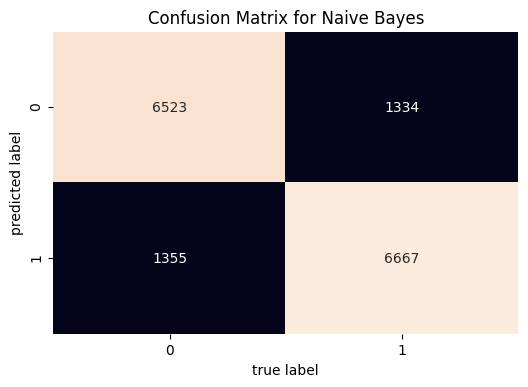

In [243]:
# Ploting confusion matrix
plotConfusionMatrics(y_test_tfid,y_pred_tfid)

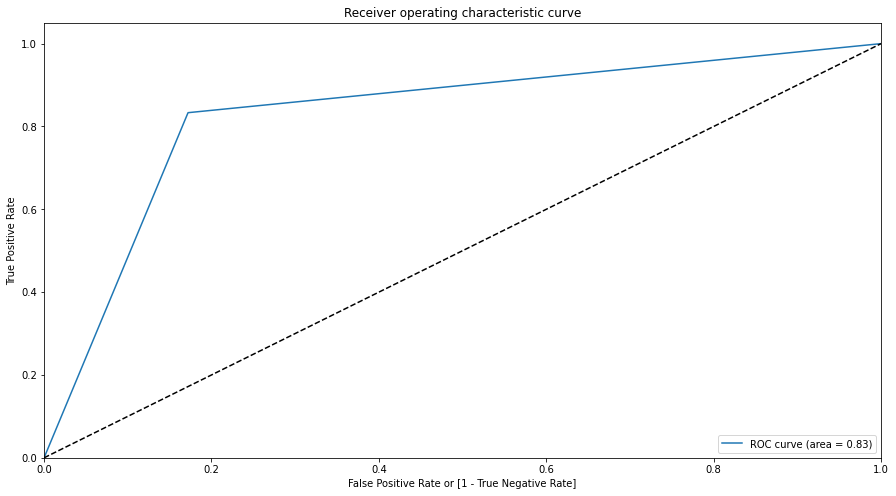

(array([0.        , 0.17199797, 1.        ]),
 array([0.        , 0.83327084, 1.        ]),
 array([2, 1, 0]))

In [244]:
#Ploting ROC curve
plotROCCurve(y_test_tfid,y_pred_tfid)

From the above scores, we obtained: (Test)

Test Accuracy - 83.0%

Sensitivity/Recall - 83%

Specificity: 82%

ROC Area under the curve (Test) - 0.90



## Logistic regression with TFID

In [245]:
# Method to Predict sentiment with probabilities using input probability cut-off
def predictWithProbability(model, X, y, prob):
    
    # predictiong

    pred_probs = model.predict_proba(X)[:,1]
    
    y_df = pd.DataFrame({'sentiment': y, 'sentiment_prob': pred_probs})
    
    # Creating a new column 
    y_df['final_predicted'] = y_df.sentiment_prob.map( lambda x: 1 if x > prob else 0)
    
    getModelEvaluationMetrics(y_df.sentiment, y_df.final_predicted,pred_probs)
    return y_df

In [246]:
# Method to find optimal cutoff for classifying as postive or negative
def findOptimalCutoff(df, cutoff = 0):
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.sentiment_prob.map( lambda x: 1 if x > i else 0)
    
    # Calculate accuracy, sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        # Getting confusion matrix
        cm = metrics.confusion_matrix(df.sentiment, df[i] )
        total = sum(sum(cm))
        # Calulating Accuracy
        accuracy = (cm[0,0] + cm[1,1]) / total
        # Calulating Specificity 
        speci = cm[0,0] / (cm[0,0] + cm[0,1])
        # Calculating Sensitivity
        sensi = cm[1,1] / (cm[1,0] + cm[1,1])
        cutoff_df.loc[i] =[i ,accuracy, sensi, speci]
        
    print(cutoff_df)
    
    # Plotting Evaluation metrics for various Probabilities
    cutoff_df.plot.line(x = 'prob', y = ['accuracy', 'sensi', 'speci'])
    #plt.vlines(x = cutoff, ymax = 1, ymin = 0, colors = 'r', linestyles = '--')
    plt.show()

In [247]:
## building model with TFID
lr=LogisticRegression()
modelfit(lr, x_train_tfid, y_train_tfid)
# Plotting Model Evaluation metrics
trainEvaluationMetrics(lr,x_train_tfid,y_train_tfid)

accuracy: 0.9184593376339443
CV Score : Mean - 0.9563746 | Std - 0.0009174517 | Min - 0.9554614 | Max - 0.9576294

Model Evaluation Metrics:
Accuracy : 0.9184
Sensitivity/Recall : 0.888
Specificity: 0.9486710427203271
ROC-AUC (Train): 0.971306


In [248]:
# Predictions on Test data
y_pred_tfid=lr.predict(x_test_tfid)
y_proba=lr.predict_proba(x_test_tfid)

In [249]:
# geting metrixs of data predicted
getModelEvaluationMetrics(y_test_tfid,y_pred_tfid,y_proba[:,1])



accuracy: 0.9016940613388752
ROC - Area under the Curve Score : 0.9605787884029094
Sensitivity/Recall : 0.8665166854143233
Specificity: 0.9374206651434375
False Positive Rate: 0.06257933485656259
Positive predictive value: 0.9336116347966604
Negative Predictive value: 0.8736543239086715
sklearn precision score value: 0.9336116347966604
RECALL SCORE : 0.8665166854143233
F1 SCORE : 0.8988137680689701


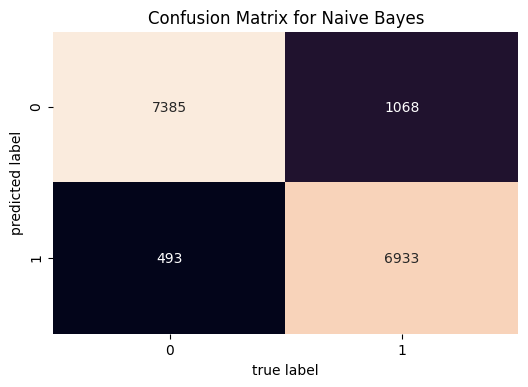

In [250]:
# Ploting confusion matrix
plotConfusionMatrics(y_test_tfid,y_pred_tfid)

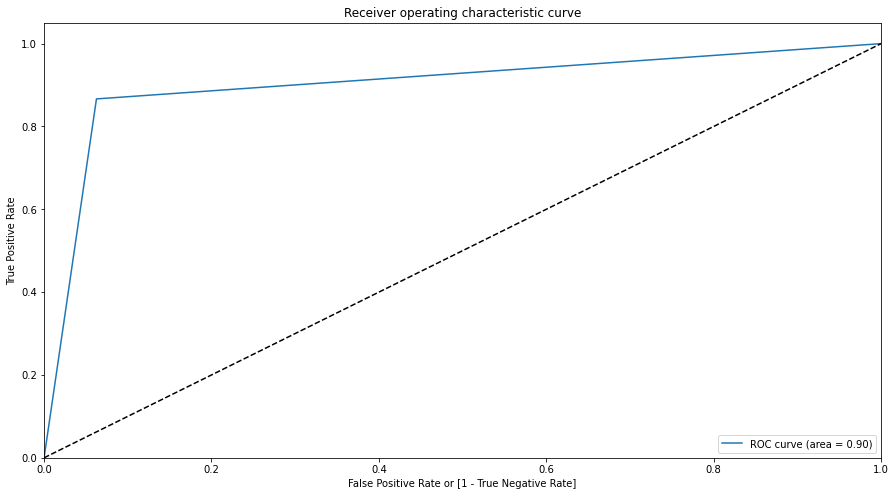

(array([0.        , 0.06257933, 1.        ]),
 array([0.        , 0.86651669, 1.        ]),
 array([2, 1, 0]))

In [251]:
# Plotting the ROC Curve
# It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
# The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
# The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.
plotROCCurve(y_test_tfid,y_pred_tfid)

From the above scores, we obtained: (Test)

Test Accuracy - 90%

Sensitivity/Recall - 86%

Specificity: 93%

ROC Area under the curve (Test) - 96%



In [252]:
# Setting the initial cut-off to 0.5
cut_off_prob = 0.5
y_train_lr = predictWithProbability(lr,x_train_tfid,y_train_tfid, cut_off_prob)
y_train_lr.head()

accuracy: 0.9184593376339443
ROC - Area under the Curve Score : 0.971305525887411
Sensitivity/Recall : 0.8880463629962628
Specificity: 0.9486710427203271
False Positive Rate: 0.05132895727967287
Positive predictive value: 0.945014409221902
Negative Predictive value: 0.8950708157774506
sklearn precision score value: 0.945014409221902
RECALL SCORE : 0.8880463629962628
F1 SCORE : 0.9156451567866417


,sentiment,sentiment_prob,final_predicted
0,0,0.084107,0
1,1,0.981713,1
2,0,0.087867,0
3,1,0.773350,1
4,1,0.979037,1


     prob  accuracy     sensi     speci
0.0   0.0  0.498340  1.000000  0.000000
0.1   0.1  0.659046  0.994475  0.325837
0.2   0.2  0.801911  0.983535  0.621489
0.3   0.3  0.885233  0.961924  0.809050
0.4   0.4  0.918432  0.932026  0.904928
0.5   0.5  0.918459  0.888046  0.948671
0.6   0.6  0.902373  0.831230  0.973044
0.7   0.7  0.871414  0.755403  0.986657
0.8   0.8  0.820589  0.646428  0.993597
0.9   0.9  0.739885  0.481124  0.996933


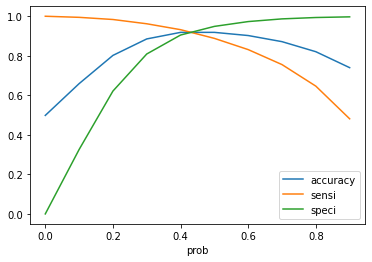

In [253]:
#Finding optimal cut off probability
findOptimalCutoff(y_train_lr)

In [254]:
# Setting the initial cut-off to 0.45
cut_off_prob = 0.4
y_train_lr = predictWithProbability(lr,x_train_tfid,y_train_tfid, cut_off_prob)
y_train_lr.head()

accuracy: 0.9184323463521282
ROC - Area under the Curve Score : 0.971305525887411
Sensitivity/Recall : 0.9320262145913448
Specificity: 0.9049284407618637
False Positive Rate: 0.09507155923813623
Positive predictive value: 0.9068774703557312
Negative Predictive value: 0.9305632400132787
sklearn precision score value: 0.9068774703557312
RECALL SCORE : 0.9320262145913448
F1 SCORE : 0.9192798760617553


,sentiment,sentiment_prob,final_predicted
0,0,0.084107,0
1,1,0.981713,1
2,0,0.087867,0
3,1,0.773350,1
4,1,0.979037,1


## Random Forest

In [255]:
## building model with TFID
rf=RandomForestClassifier()
rf.fit(x_train_tfid,y_train_tfid)
trainEvaluationMetrics(rf,x_train_tfid,y_train_tfid)



Model Evaluation Metrics:
Accuracy : 0.9999
Sensitivity/Recall : 0.9999
Specificity: 0.9998923921231034
ROC-AUC (Train): 1.000000


In [256]:
# Predictions on Test data
y_pred_tfid=rf.predict(x_test_tfid)
y_proba_tfid=rf.predict_proba(x_test_tfid)

In [257]:
# geting metrixs of data predicted
getModelEvaluationMetrics(y_test_tfid,y_pred_tfid,y_proba_tfid[:, 1])



accuracy: 0.961836387681844
ROC - Area under the Curve Score : 0.9950212414740364
Sensitivity/Recall : 0.9447569053868267
Specificity: 0.9791825336379791
False Positive Rate: 0.020817466362020816
Positive predictive value: 0.9787647287323579
Negative Predictive value: 0.9458067680235409
sklearn precision score value: 0.9787647287323579
RECALL SCORE : 0.9447569053868267
F1 SCORE : 0.9614601882472653


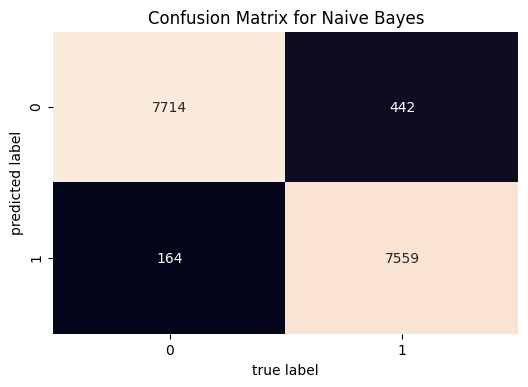

In [258]:
# Ploting confusion matrix
plotConfusionMatrics(y_test_tfid,y_pred_tfid)


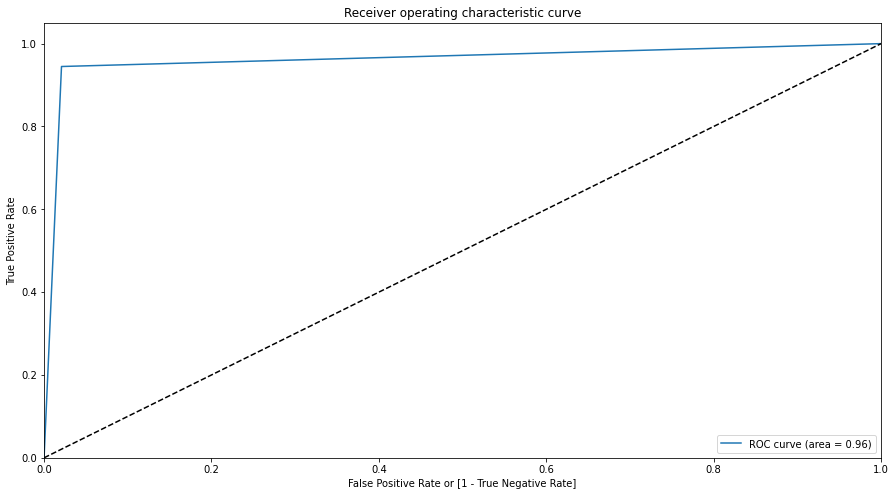

(array([0.        , 0.02081747, 1.        ]),
 array([0.        , 0.94475691, 1.        ]),
 array([2, 1, 0]))

In [259]:
#Ploting ROC curve
plotROCCurve(y_test_tfid,y_pred_tfid)

From the above scores, we obtained: (Test)

Test Accuracy - 96%

Sensitivity/Recall - 94%

Specificity: 97%

ROC Area under the curve (Test) - 99%

In [260]:
# Saving model to disk
pickle.dump(rf, open('randomforest.pkl','wb'))

In [261]:
model = pickle.load(open('randomforest.pkl','rb'))
l=["very nice product"]
m=tfid.transform(l)
print(model.predict(m))
print(model.predict_proba(m)[:,1])

[1]
[0.9]


# XGBosst

In [262]:

# Fitting the XGBClassifier
xgb1 = XGBClassifier()

# Model fit and performance on Train data
xgb1.fit( x_train_tfid,y_train_tfid)

#train model evaluation
trainEvaluationMetrics(xgb1,x_train_tfid,y_train_tfid)


Model Evaluation Metrics:
Accuracy : 0.8375
Sensitivity/Recall : 0.8149
Specificity: 0.8601635639728828
ROC-AUC (Train): 0.921885


In [263]:
# Predictions on Test data
y_pred_tfid = xgb1.predict(x_test_tfid)
y_pred_prob = xgb1.predict_proba(x_test_tfid)
roc = metrics.roc_auc_score(y_test_tfid, y_pred_prob[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 91.20%


In [264]:
# geting metrixs of data predicted
getModelEvaluationMetrics(y_test_tfid,y_pred_tfid,y_pred_prob[:, 1])

accuracy: 0.8247370741230556
ROC - Area under the Curve Score : 0.9119941738051974
Sensitivity/Recall : 0.7956505436820397
Specificity: 0.8542777354658543
False Positive Rate: 0.14572226453414572
Positive predictive value: 0.8472185254192175
Negative Predictive value: 0.8045427375971309
sklearn precision score value: 0.8472185254192175
RECALL SCORE : 0.7956505436820397
F1 SCORE : 0.8206252014179825


## Hyperparameter tunning for the XGBClassifer


__max_depth__ : is the maximum number of nodes allowed from the root to the farthest leaf of a tree.

__min_child_weight__ : is the minimum weight (or number of samples if all samples have a weight of 1) required in order to create a new node in the tree. 

__colsample_bytree__ : corresponds to the fraction of features (the columns) to use. By default it is set to 1 meaning that we will use all features.

__gamma__ : Gamma specifies the minimum loss reduction required to make a split.

__learning rate__ : Makes the model more robust by shrinking the weights on each step

In [ ]:
# Hyperparameter tunning for the XGBClassifer
# Tunning the max_depth 
param_max_depth = {'max_depth' : [1,2]}
gsearch2 = GridSearchCV(estimator = XGBClassifier(n_estimators=200, nthread = 5, seed = 27), param_grid = param_max_depth, scoring = 'roc_auc', cv = 3,verbose=3)
gsearch2.fit(x_train_tfid,y_train_tfid)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... max_depth=1, score=0.870, total= 2.5min
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min remaining:    0.0s


[CV] ......................... max_depth=1, score=0.879, total= 2.4min
[CV] max_depth=1 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.9min remaining:    0.0s


[CV] ......................... max_depth=1, score=0.878, total= 2.4min
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.912, total= 3.9min
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.916, total= 3.8min
[CV] max_depth=2 .....................................................
[CV] ......................... max_depth=2, score=0.916, total= 3.9min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 18.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=5, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None, param_grid={'max_depth': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=3)

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 2}, 0.9145756205464762)

In [ ]:
# Hyperparameter tunning for the XGBClassifer
# Tunning the max_depth other other values
param_max_depth = {'max_depth' : [3,4]}
gsearch2 = GridSearchCV(estimator = XGBClassifier(n_estimators=200, nthread = 5, seed = 27), param_grid = param_max_depth, scoring = 'roc_auc', cv = 3,verbose=3)
gsearch2.fit(x_train_tfid,y_train_tfid)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... max_depth=3, score=0.935, total= 5.3min
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.3min remaining:    0.0s


[CV] ......................... max_depth=3, score=0.939, total= 5.3min
[CV] max_depth=3 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 10.5min remaining:    0.0s


[CV] ......................... max_depth=3, score=0.938, total= 5.3min
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.949, total= 6.6min
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.951, total= 6.5min
[CV] max_depth=4 .....................................................
[CV] ......................... max_depth=4, score=0.953, total= 6.5min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 35.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=5, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None, param_grid={'max_depth': [3, 4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=3)

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 4}, 0.9511680297692889)

In [ ]:
# Hyperparameter tunning for the XGBClassifer
# Tunning the min_child_weight
param_min_child_weight = {"min_child_weight" : [ 1, 3, 5, 7 ]}
gsearch3 = GridSearchCV(estimator = XGBClassifier(n_estimators = 200,max_depth=4, objective = 'binary:logistic',nthread = 5, seed = 27), param_grid = param_min_child_weight, scoring = 'roc_auc', cv = 3,verbose=3)
gsearch3.fit(x_train_tfid,y_train_tfid)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] min_child_weight=1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. min_child_weight=1, score=0.949, total= 6.5min
[CV] min_child_weight=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  6.5min remaining:    0.0s


[CV] .................. min_child_weight=1, score=0.951, total= 6.6min
[CV] min_child_weight=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 13.0min remaining:    0.0s


[CV] .................. min_child_weight=1, score=0.953, total= 6.6min
[CV] min_child_weight=3 ..............................................
[CV] .................. min_child_weight=3, score=0.947, total= 6.6min
[CV] min_child_weight=3 ..............................................
[CV] .................. min_child_weight=3, score=0.949, total= 6.7min
[CV] min_child_weight=3 ..............................................
[CV] .................. min_child_weight=3, score=0.950, total= 6.7min
[CV] min_child_weight=5 ..............................................
[CV] .................. min_child_weight=5, score=0.947, total= 6.6min
[CV] min_child_weight=5 ..............................................
[CV] .................. min_child_weight=5, score=0.948, total= 6.7min
[CV] min_child_weight=5 ..............................................
[CV] .................. min_child_weight=5, score=0.949, total= 6.7min
[CV] min_child_weight=7 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 79.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=4, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=5, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'min_child_weight': [1, 3, 5, 7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=3)

In [ ]:
gsearch3.best_params_, gsearch3.best_score_

({'min_child_weight': 1}, 0.9511680297692889)

In [ ]:
# Some more hyperparameter tunning for the XGBClassifer
# Tunning the gamma
param_gamma = {"gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]}
gsearch4 = GridSearchCV(estimator = XGBClassifier(n_estimators = 200,max_depth=4,min_child_weight=1, objective = 'binary:logistic',nthread = 5, seed = 27), param_grid = param_gamma, scoring = 'roc_auc', cv = 3,verbose=3)
gsearch4.fit(x_train_tfid,y_train_tfid)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] gamma=0.0 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... gamma=0.0, score=0.949, total= 7.7min
[CV] gamma=0.0 .......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.7min remaining:    0.0s


[CV] ........................... gamma=0.0, score=0.951, total= 7.6min
[CV] gamma=0.0 .......................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 15.3min remaining:    0.0s


[CV] ........................... gamma=0.0, score=0.953, total= 7.6min
[CV] gamma=0.1 .......................................................
[CV] ........................... gamma=0.1, score=0.949, total= 7.6min
[CV] gamma=0.1 .......................................................
[CV] ........................... gamma=0.1, score=0.951, total= 7.6min
[CV] gamma=0.1 .......................................................
[CV] ........................... gamma=0.1, score=0.953, total= 7.6min
[CV] gamma=0.2 .......................................................
[CV] ........................... gamma=0.2, score=0.950, total= 7.6min
[CV] gamma=0.2 .......................................................
[CV] ........................... gamma=0.2, score=0.952, total= 7.6min
[CV] gamma=0.2 .......................................................
[CV] ........................... gamma=0.2, score=0.953, total= 7.6min
[CV] gamma=0.3 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 114.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=4, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=5, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=3)

In [ ]:
gsearch4.best_params_, gsearch4.best_score_

({'gamma': 0.2}, 0.9517655278737994)

In [ ]:
# Some more hyperparameter tunning for the XGBClassifer
# Tunning the learning_rate
param_learning_rate =  {"learning_rate"    : [0.10, 0.15, 0.20, 0.25, 0.30 ]}
gsearch5 = GridSearchCV(estimator = XGBClassifier(n_estimators = 200,max_depth=4,min_child_weight=1,gamma=0.2, objective = 'binary:logistic',nthread = 5, seed = 27), param_grid = param_learning_rate, scoring = 'roc_auc',cv = 3,verbose=3)
gsearch5.fit(x_train_tfid,y_train_tfid)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] learning_rate=0.1 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... learning_rate=0.1, score=0.950, total= 7.7min
[CV] learning_rate=0.1 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.7min remaining:    0.0s


[CV] ................... learning_rate=0.1, score=0.952, total= 7.7min
[CV] learning_rate=0.1 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 15.4min remaining:    0.0s


[CV] ................... learning_rate=0.1, score=0.953, total= 7.7min
[CV] learning_rate=0.15 ..............................................
[CV] .................. learning_rate=0.15, score=0.960, total= 7.7min
[CV] learning_rate=0.15 ..............................................
[CV] .................. learning_rate=0.15, score=0.961, total= 7.6min
[CV] learning_rate=0.15 ..............................................
[CV] .................. learning_rate=0.15, score=0.962, total= 7.6min
[CV] learning_rate=0.2 ...............................................
[CV] ................... learning_rate=0.2, score=0.966, total= 7.6min
[CV] learning_rate=0.2 ...............................................
[CV] ................... learning_rate=0.2, score=0.967, total= 7.6min
[CV] learning_rate=0.2 ...............................................
[CV] ................... learning_rate=0.2, score=0.967, total= 7.6min
[CV] learning_rate=0.25 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 114.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.2,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=4, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=5, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', 

In [ ]:
gsearch5.best_params_, gsearch5.best_score_

({'learning_rate': 0.3}, 0.9728073310732626)

In [ ]:
# Some more hyperparameter tunning for the XGBClassifer
# Tunning the colsample_bytree
param_colsample_bytree = {"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}
gsearch6 = GridSearchCV(estimator = XGBClassifier(n_estimators = 200,max_depth=4,min_child_weight=1,gamma=0.2,learning_rate=0.3, objective = 'binary:logistic',nthread = 5, seed = 27), param_grid = param_colsample_bytree, scoring = 'roc_auc',cv = 3,verbose=3)
gsearch6.fit(x_train_tfid,y_train_tfid)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] colsample_bytree=0.3 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ colsample_bytree=0.3, score=0.971, total= 3.2min
[CV] colsample_bytree=0.3 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s


[CV] ................ colsample_bytree=0.3, score=0.972, total= 3.1min
[CV] colsample_bytree=0.3 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.3min remaining:    0.0s


[CV] ................ colsample_bytree=0.3, score=0.973, total= 3.1min
[CV] colsample_bytree=0.4 ............................................
[CV] ................ colsample_bytree=0.4, score=0.971, total= 3.8min
[CV] colsample_bytree=0.4 ............................................
[CV] ................ colsample_bytree=0.4, score=0.973, total= 3.8min
[CV] colsample_bytree=0.4 ............................................
[CV] ................ colsample_bytree=0.4, score=0.972, total= 3.8min
[CV] colsample_bytree=0.5 ............................................
[CV] ................ colsample_bytree=0.5, score=0.973, total= 4.4min
[CV] colsample_bytree=0.5 ............................................
[CV] ................ colsample_bytree=0.5, score=0.973, total= 4.4min
[CV] colsample_bytree=0.5 ............................................
[CV] ................ colsample_bytree=0.5, score=0.972, total= 4.4min
[CV] colsample_bytree=0.7 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 51.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.2,
                                     learning_rate=0.3, max_delta_step=0,
                                     max_depth=4, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=5, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verb

In [ ]:
gsearch6.best_params_, gsearch6.best_score_

({'colsample_bytree': 0.7}, 0.9727135937435909)

### Final XGBClassifier

In [ ]:

xgb2 = XGBClassifier(n_estimators = 200,max_depth=4,min_child_weight=1,gamma=0.2,learning_rate=0.3, colsample_bytree = 0.7, objective = 'binary:logistic', seed = 27)

# Model fit and performance on Train data
modelfit(xgb2, x_train_tfid,y_train_tfid)

accuracy: 0.9456935409862615
CV Score : Mean - 0.9727136 | Std - 0.0005072573 | Min - 0.9720163 | Max - 0.9732081


In [ ]:
#train model evaluation
trainEvaluationMetrics(xgb2,x_train_tfid,y_train_tfid)


Model Evaluation Metrics:
Accuracy : 0.9456
Sensitivity/Recall : 0.9292
Specificity: 0.9620682233939525
ROC-AUC (Train): 0.988212


In [ ]:
# Prediction on Test data
y_pred_tfid = xgb2.predict(x_test_tfid)
y_proba_tfid=xgb2.predict_proba(x_test_tfid)

In [ ]:
# Model evaluation on Test data
getModelEvaluationMetrics(y_test_tfid,y_pred_tfid,y_proba_tfid[:, 1])

accuracy: 0.918319793437874
ROC - Area under the Curve Score : 0.9764297916048131
Sensitivity/Recall : 0.9006374203224597
Specificity: 0.9362782432089363
False Positive Rate: 0.06372175679106372
Positive predictive value: 0.9348728593668916
Negative Predictive value: 0.902704687308775
sklearn precision score value: 0.9348728593668916
RECALL SCORE : 0.9006374203224597
F1 SCORE : 0.9174358647908841


In [ ]:
# Let's see if we can achive a better Recall rate by Deciding an optimal cut-off for the model to predict sentiment.
# Setting the initial cut-off to 0.5
cut_off_prob = 0.5
y_train_xg = predictWithProbability(xgb2, x_train_tfid,y_train_tfid, cut_off_prob)
y_train_xg.head()

accuracy: 0.9456935409862615
ROC - Area under the Curve Score : 0.9882120795929474
Sensitivity/Recall : 0.9292097708931376
Specificity: 0.9620682233939525
False Positive Rate: 0.03793177660604756
Positive predictive value: 0.9605285258384189
Negative Predictive value: 0.9318845111528038
sklearn precision score value: 0.9605285258384189
RECALL SCORE : 0.9292097708931376
F1 SCORE : 0.9446096244906947


,sentiment,sentiment_prob,final_predicted
0,0,0.145750,0
1,1,0.939929,1
2,0,0.145560,0
3,1,0.863967,1
4,1,0.993664,1


     prob  accuracy     sensi     speci
0.0   0.0  0.498340  1.000000  0.000000
0.1   0.1  0.735755  0.998863  0.474389
0.2   0.2  0.852790  0.993338  0.713171
0.3   0.3  0.916759  0.981206  0.852739
0.4   0.4  0.942805  0.961978  0.923760
0.5   0.5  0.945694  0.929210  0.962068
0.6   0.6  0.931604  0.879597  0.983267
0.7   0.7  0.903911  0.814061  0.993167
0.8   0.8  0.857243  0.715918  0.997633
0.9   0.9  0.778644  0.556302  0.999516


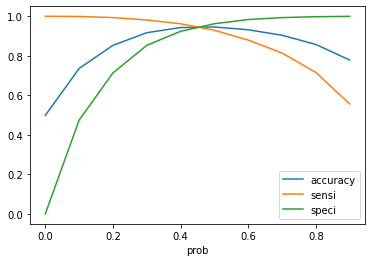

In [ ]:
# Lets plot the accuracy, Sensitivity and Specificity to find the best cut off point
findOptimalCutoff(y_train_xg)

In [ ]:
# Predicting with the choosen cut-off on training data
cut_off_prob = 0.45
y_train_xg = predictWithProbability(xgb2, x_train_tfid,y_train_tfid, cut_off_prob)

accuracy: 0.9459634538044212
ROC - Area under the Curve Score : 0.9882120795929474
Sensitivity/Recall : 0.946433407355251
Specificity: 0.9454966103518777
False Positive Rate: 0.05450338964812224
Positive predictive value: 0.9452047384648672
Negative Predictive value: 0.9467191035448767
sklearn precision score value: 0.9452047384648672
RECALL SCORE : 0.946433407355251
F1 SCORE : 0.9458186738836266


In [ ]:
# Predicting with the choosen cut-off on test data
y_test_xg = predictWithProbability(xgb2, x_test_tfid, y_test_tfid, cut_off_prob)

accuracy: 0.9211537250456577
ROC - Area under the Curve Score : 0.9764297916048131
Sensitivity/Recall : 0.9227596550431196
Specificity: 0.9195227215029195
False Positive Rate: 0.08047727849708047
Positive predictive value: 0.9209180491455656
Negative Predictive value: 0.9213940473162046
sklearn precision score value: 0.9209180491455656
RECALL SCORE : 0.9227596550431196
F1 SCORE : 0.9218379323261332


# Model Comparisions:

| Model |Accuracy (Train/Test) | Sensitivity (Train/Test) | Specificity (Train/Test) | ROC - Area under curve (Train/Test) | 
| --- | --- | --- | --- | --- |
| Navie baise | **85% / 83%** | **85% / 83%** | **84% / 82%** | **0.92 / 0.90** |
| Logistic Regression |**91% / 90%** | **88%** / **86%** | **94% / 93%** | **0.97 / 0.96** |
|<font color = 'red'>  Random Forest </font>| **99% / 96%** | **99% / 94%** | **99% / 97%** | **1 /0.99** |
| XGBoost | **83% / 82%** | **81% / 79%** | **86% / 85%** | **0.92 / 0.91** |
| XGBoost (tunning) | **94 % / 92%** | **92 % / 92%** | **96% / 91%** | **0.98 / 0.97** |

Among all the 4 type of models, __Random Forest__ is giving us better results with good Sensitivity/Recall values.

--------------------------------------------------------------------------------

# Recomendation system

--------------------------------------------------------------------------------

In [265]:
#importing required Libraries
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from numpy import *
import seaborn as sns
import matplotlib.pyplot as plt

In [266]:
# reading the csv file
path="/content/sample30.csv"
review=pd.read_csv(path)

In [267]:
review=pd.read_csv(path)
review.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive


In [268]:
#checking the unique data
review[['id','name','reviews_username','reviews_rating']].head(10)


,id,name,reviews_username,reviews_rating
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,rebecca,1
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,walker557,1
5,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,samantha,1
6,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,raeanne,1
7,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,kimmie,1
8,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,cassie,1
9,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,moore222,1


From above we can see user "dorothy w" is having duplicate entry for same Product and rating, so we will drop those record in next few steps

In [269]:
#copying the original data to another dataframe
data=review.copy()

In [270]:
# taking only the columns needed for recommendation
data=data[['id','name','reviews_username','reviews_rating']]

In [271]:
#Renaming the columns as per our need
data.rename(columns={'name':'product','reviews_username':'user','reviews_rating':'rating'},inplace=True)

In [272]:
data.head(2)

,id,product,user,rating
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,5
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,5


In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       30000 non-null  object
 1   product  30000 non-null  object
 2   user     29937 non-null  object
 3   rating   30000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 937.6+ KB


In [274]:
# number of ratings
print(len(data))

# number of users
print(len(data['user'].unique()))

# number of unique Product 
print(len(data['id'].unique()))

30000
24915
271


In [275]:
data.shape

(30000, 4)

In [276]:
# Droping  data having duplicate records, which same user as rated for same product more than once
data = data.drop_duplicates(
  subset = ['product','user'],
  keep = 'last').reset_index(drop = True)

In [277]:
#Size of the data set after droping duplicate records 
data.shape

(27605, 4)

In [278]:
data['user']=data['user'].astype(str)

In [279]:
#Checking if there is any NaN vlues in data
data.isnull().sum()/len(data)

id         0.0
product    0.0
user       0.0
rating     0.0
dtype: float64

In [280]:
data.shape

(27605, 4)

# EDA

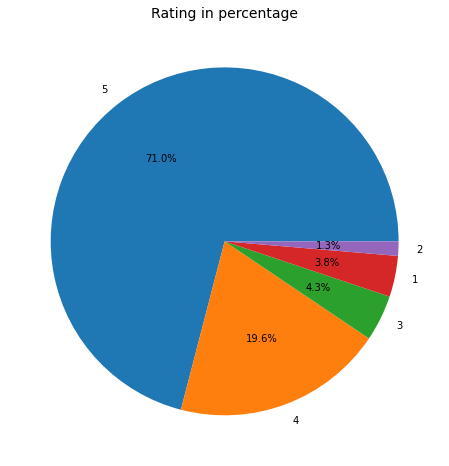

In [281]:
#Ploting rating distributions 
plt.figure(figsize=[10,8])
plt.pie(x=data.rating.value_counts(),labels=data.rating.value_counts().index,autopct="%.1f%%")
plt.title("Rating in percentage", fontsize=14);

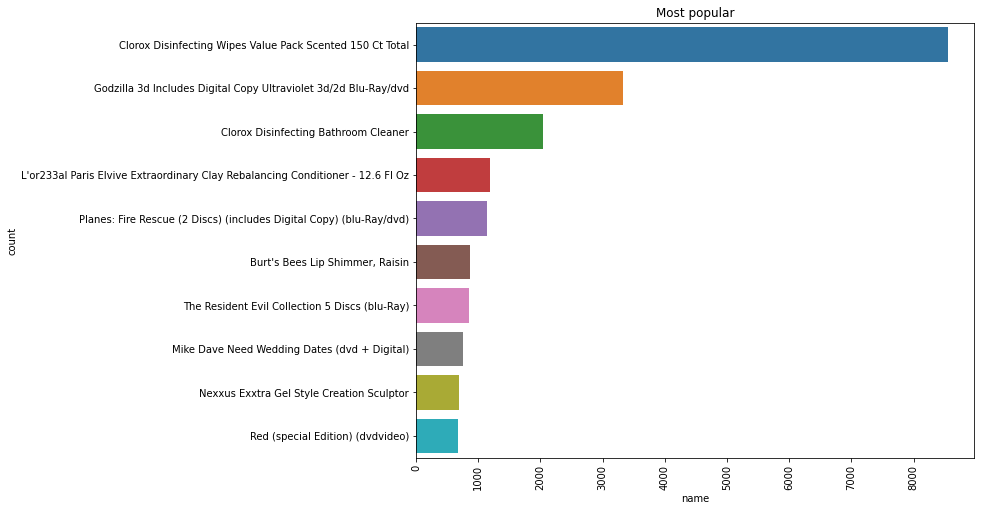

In [282]:
#Ploting the top 10 most purchased Product 
df1 = review['name'].value_counts()
plt.figure(figsize=[10,8])
sns.barplot(y=df1.sort_values(ascending=False).index[0:10],x=df1.sort_values(ascending=False)[0:10])
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('Most popular')
 
plt.show()


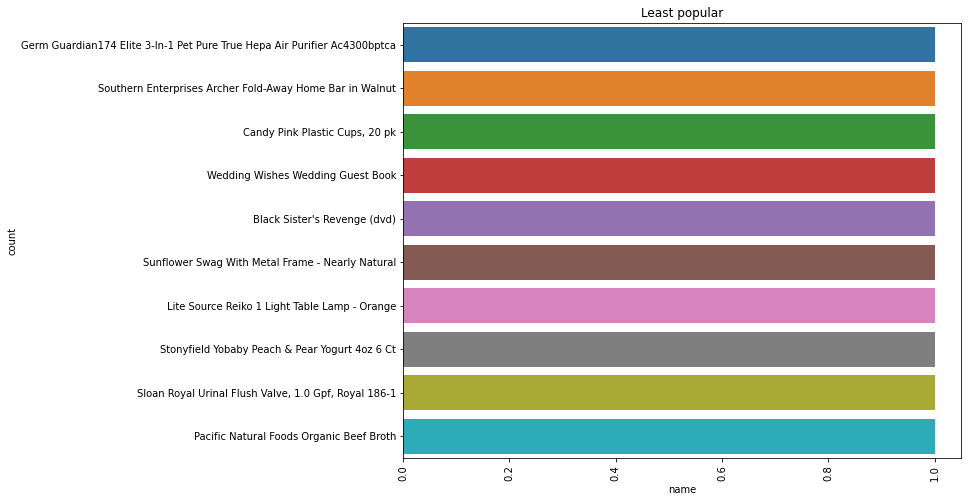

In [283]:
#Ploting the top 10 Least purchased Product 
plt.figure(figsize=[10,8])
sns.barplot(y=df1.sort_values(ascending=True).index[0:10],x=df1.sort_values(ascending=True)[0:10])
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.title('Least popular')
 
plt.show()



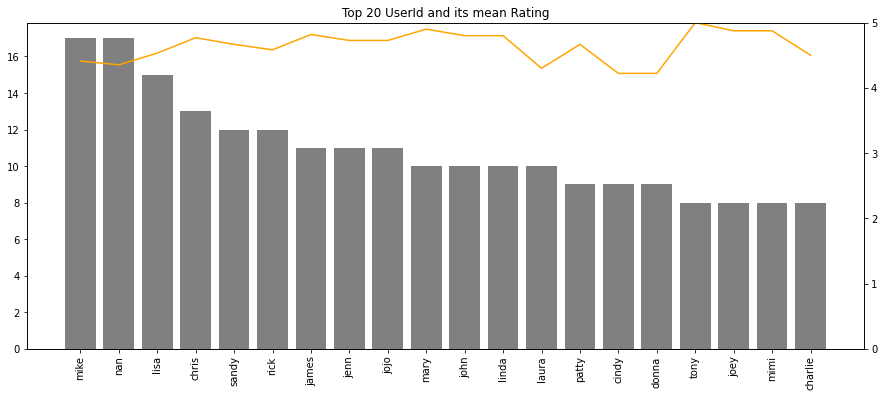

In [284]:
#Top users, rated good on average
data_user_rate=pd.DataFrame(data.groupby('user')['rating'].agg(['mean','count']),
                            columns=['mean','count']).sort_values(by=['count','mean'],ascending=False)[:20]
                            
#Top 20 users basis no of ratings provided and average rating
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.bar(data_user_rate.index,data_user_rate['count'],color='grey')
plt.xticks(rotation=90)
ax2 = ax1.twinx()
ax2.plot(data_user_rate.index,data_user_rate['mean'],color='orange')
plt.ylim(0, 5)
plt.title("Top 20 UserId and its mean Rating")
plt.show()

Text(0.5, 0, 'Count of products')

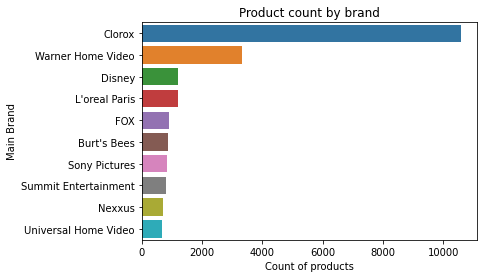

In [285]:
#Top 10 brand
order = review['brand'].value_counts()[:10].index
sns.countplot(y='brand', data=review, order=order)
plt.title("Product count by brand")
plt.ylabel("Main Brand")
plt.xlabel("Count of products")

Text(0.5, 0, 'Count of products')

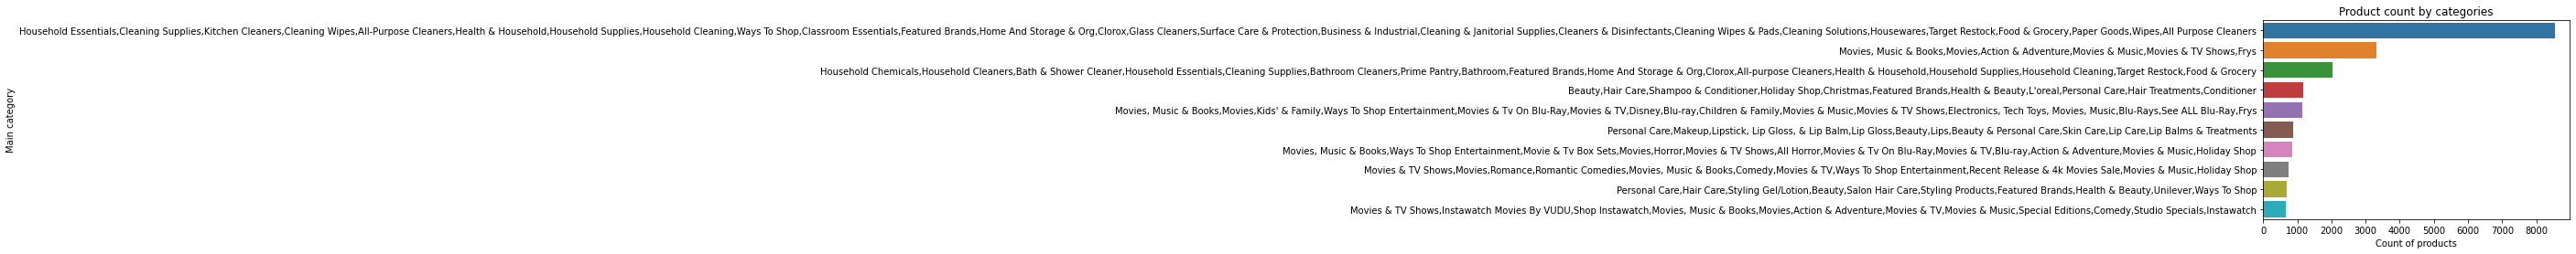

In [286]:
#Top 10 categories
order = review['categories'].value_counts()[:10].index
sns.countplot(y='categories', data=review, order=order)
plt.title("Product count by categories")
plt.ylabel("Main category")
plt.xlabel("Count of products")

Text(0.5, 0, 'Count of Rating')

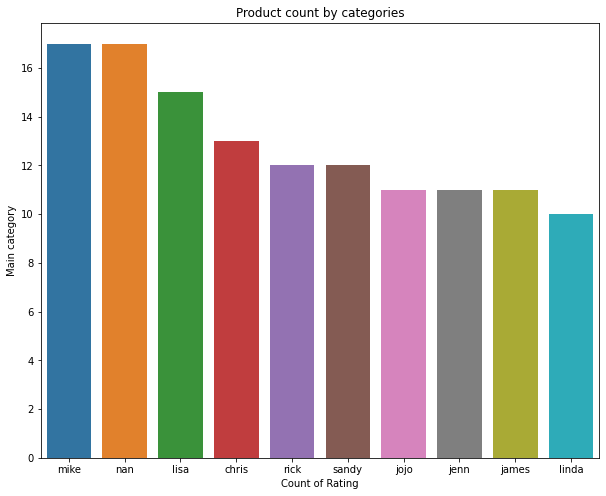

In [287]:

#Top 10 user rated most
order = data.user.value_counts()[:10].index
plt.figure(figsize=[10,8])
sns.countplot(x='user', data=data, order=order)
plt.title("Product count by categories")
plt.ylabel("Main category")
plt.xlabel("Count of Rating")

## Dividing the dataset into train and test

In [288]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.30, random_state=42)

In [289]:
#checking size of train and test data
print(train.shape)
print(test.shape)

(19323, 4)
(8282, 4)


In [290]:
# No of unique products in train set
len(train['product'].unique())

251

In [291]:
train.head()

,id,product,user,rating
9194,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,michelle098,5
13730,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,1shop,5
23348,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,nunchaku1,5
23099,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,infernalflora,5
11828,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,jennyalindogan,5


In [292]:
# number of unique user in train se
len(train['user'].unique())

17822

In [293]:
# Pivot the train ratings' dataset into matrix format in which columns are Products and the rows are user IDs.
df_pivot = train.pivot(
    index='user',
    columns='product',
    values='rating'
).fillna(0)

df_pivot.head(3)

product,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Starbucks153 Doubleshot Protein Coffee - 11 Fl Oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek",Sunflower Swag With Metal Frame - Nearly Natural,"Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Original Restaurant Style Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [294]:
df_pivot.shape

(17822, 251)

### Creating dummy train & dummy test dataset
These dataset will be used for prediction 
- Dummy train will be used later for prediction of the products which has not been rated by the user. To ignore the products rated by the user, we will mark it as 0 during prediction. The products not rated by user is marked as 1 for prediction in dummy train dataset. 

- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.

In [295]:
train.shape

(19323, 4)

In [296]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [297]:
dummy_train.head()

,id,product,user,rating
9194,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,michelle098,5
13730,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,1shop,5
23348,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,nunchaku1,5
23099,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,infernalflora,5
11828,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,jennyalindogan,5


In [298]:
# The Product  not rated by user is marked as 1 for prediction. 
dummy_train['rating'] = dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)

In [299]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot(
    index='user',
    columns='product',
    values='rating'
).fillna(1)

In [300]:
dummy_train.head(10)

product,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Starbucks153 Doubleshot Protein Coffee - 11 Fl Oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek",Sunflower Swag With Metal Frame - Nearly Natural,"Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Original Restaurant Style Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [301]:
dummy_train.shape

(17822, 251)

**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is Rating Vector in this case] 

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different Products.

# User Similarity Matrix

### Using Cosine Similarity

In [302]:
df_pivot.index.nunique()

17822

In [303]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation_cos = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation_cos[np.isnan(user_correlation_cos)] = 0
print(user_correlation_cos)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]]


In [304]:
user_correlation_cos.shape

(17822, 17822)

### Using adjusted Cosine 

### Here, we are not removing the NaN values and calculating the mean only for the Products rated by the user

In [305]:
# Create a user-Products matrix.
df_pivot = train.pivot(
    index='user',
    columns='product',
    values='rating'
)

In [306]:
df_pivot.head()

product,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Starbucks153 Doubleshot Protein Coffee - 11 Fl Oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek",Sunflower Swag With Metal Frame - Nearly Natural,"Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Original Restaurant Style Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

### Normalising the rating of the Product for each user around 0 mean

In [307]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [308]:
df_pivot.shape

(17822, 251)

In [309]:
df_subtracted.head()

product,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Starbucks153 Doubleshot Protein Coffee - 11 Fl Oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek",Sunflower Swag With Metal Frame - Nearly Natural,"Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Original Restaurant Style Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

### Finding cosine similarity

In [310]:
from sklearn.metrics.pairwise import pairwise_distances

In [311]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation_adjcos = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation_adjcos[np.isnan(user_correlation_adjcos)] = 0
print(user_correlation_adjcos)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [312]:
user_correlation_adjcos.shape

(17822, 17822)

## Prediction - User User

In [313]:
def predict(user_correlation,df_pivot):
  #Doing the prediction for the users which are positively related with other users,
  # and not the users which are negatively related as we are interested in 
  #the users which are more similar to the current users. So, ignoring the correlation for values less than 0.
  user_correlation[user_correlation<0]=0
  user_correlation


  #Rating predicted by the user (for Products rated as well as not rated)
  #is the weighted sum of correlation with the Product rating (as present in the rating dataset).
  user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
  user_predicted_ratings

  user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
  user_predicted_ratings

  #Since we are interested only in the Products not rated by the user,
  # we will ignore the Products rated by the user by making it zero.

  user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
  return user_final_rating

## Predicting using cosine similarity

In [314]:
user_final_rating_cos=predict(user_correlation_cos,df_pivot)

#### Finding the top 5 recommendation for the *user*

In [315]:
user_final_rating_cos.head(3)

product,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Starbucks153 Doubleshot Protein Coffee - 11 Fl Oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek",Sunflower Swag With Metal Frame - Nearly Natural,"Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Original Restaurant Style Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [316]:
# Take the user ID as input.
user_input = '00dog3'#input("Enter your user name")
print(user_input)
d = user_final_rating_cos.loc[user_input].sort_values(ascending=False)[0:20]
d

00dog3


product
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                          6.669017
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                4.467890
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                               3.782266
Alex Cross (dvdvideo)                                                              3.123475
Mike Dave Need Wedding Dates (dvd + Digital)                                       2.886751
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack    2.886751
Burt's Bees Lip Shimmer, Raisin                                                    2.201127
Power Crunch Protein Energy Bar Peanut Butter Creme Original                       2.201127
Clorox Disinfecting Bathroom Cleaner                                               1.581139
Clear Scalp & Hair Therapy Total Care Nourishing Shampoo                           1.581139
Bounce Dryer Sheets, Fresh Linen, 160 sheets                            

#### Predicting using Adjusted cosine similarity

In [317]:
#user_final_rating.to_csv('user_final_rating.csv',index=True,index_label='user')

In [318]:
user_final_rating_adjcos=predict(user_correlation_adjcos,df_pivot)

In [319]:
user_final_rating_adjcos.head(3)

product,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Starbucks153 Doubleshot Protein Coffee - 11 Fl Oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek",Sunflower Swag With Metal Frame - Nearly Natural,"Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Original Restaurant Style Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [320]:
# Take the user ID as input.
user_input = '00dog3'#input("Enter your user name")
print(user_input)
d = user_final_rating_adjcos.loc[user_input].sort_values(ascending=False)[0:20]
d

00dog3


product
Yes To Grapefruit Rejuvenating Body Wash                                     0.0
Elvis Presley - Girl Happy (cd)                                              0.0
Head & Shoulders Dandruff Shampoo Ocean Lift 2 In 1                          0.0
Head & Shoulders Classic Clean Conditioner                                   0.0
Hawaiian Punch Berry Limeade Blast Juice                                     0.0
Happy Tot Apple and Butternut Squash                                         0.0
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd              0.0
Germ Guardian174 Elite 3-In-1 Pet Pure True Hepa Air Purifier Ac4300bptca    0.0
Gain Original Scent Liquid Fabric Softener 129 Oz                            0.0
Fiskars174 Classic Stick Rotary Cutter (45 Mm)                               0.0
Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count           0.0
Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct                      0.0
Feit 60-Watt A19 Gu2

# Evaluation - User User 

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the Product already rated by the user insead of predicting it for the Product not rated by the user. 

In [321]:
# Convert the user_correlation matrix into dataframe.
def into_dataframe(field,correlation_field,df,common_df,common_user_based_matrix_df):
  user_correlation_df = pd.DataFrame(correlation_field)
  user_correlation_df[field] = df.index

  user_correlation_df.set_index(field,inplace=True)


  list_name = common_df[field].tolist()
  user_correlation_df.columns = df.index.tolist()
  user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

  user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
  user_correlation_df_3 = user_correlation_df_2.T

  user_correlation_df_3[user_correlation_df_3<0]=0
  common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix_df.fillna(0))
  return common_user_predicted_ratings

In [322]:
#function used to calculate the RSME
def cal_rsme(common_user_predicted_ratings_df,common_df,index_name,columns_name):
  
  X  = common_user_predicted_ratings_df.copy() 
  X = X[X>0]
  scaler = MinMaxScaler(feature_range=(1, 5))
  scaler.fit(X)
  y = (scaler.transform(X))
  common_ = common_df.pivot_table(index=index_name, columns=columns_name, values='rating')
  # Finding total non-NaN value
  total_non_nan = np.count_nonzero(~np.isnan(y))
  rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
  print(rmse)

In [323]:
# Find out the common users of test and train dataset.
common = test[test.user.isin(train.user)]
common.shape

(1048, 4)

In [324]:
common.head()

,id,product,user,rating
20804,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishi...,steph,1
5312,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),movielover,5
11660,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,james1000,5
8047,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,beth46,5
17767,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,kourt26,5


In [325]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='user', columns='product', values='rating')

In [326]:
common_user_based_matrix.head()

product,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Ambi Complexion Cleansing Bar,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium","Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,CeraVe SA Renewing Cream,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Colorganics Lipstick, Cayenne","Coty Airspun Face Powder, Translucent Extra Coverage",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Equals (blu-Ray),Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Head & Shoulders Classic Clean Conditioner,...,Pantene Pro-V Expert Collection Age Defy Conditioner,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),"Pleasant Hearth 1,800 sq ft Wood Burning Stove with Blower, Medium, LWS-127201","Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black",Pleasant Hearth Diamond Fireplace Screen - Espresso,Power Crunch Protein Energy Bar Peanut Butter Creme Original,Progresso Traditional Chicken Tuscany Soup,Ragu Roasted Garlic Parmesan Pasta Sauce,Ragu Traditional Pasta Sauce,Red (special Edition) (dvdvideo),Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel,"Shea Moisture Mango & Carrot Kids Extra-Nourishing Conditioner, 8fl Oz",Solo Foods Poppy Seed Cake and Pastry Filling,Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz,Spam Single Classic,Stacy's Simply Naked Bagel Chips,Stander Pt Bedcane - Bed Handle,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wa

In [327]:
#copying to dummy test and marking 1 if rated else 0
dummy_test = common.copy()

dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='user', columns='product', values='rating').fillna(0)

In [328]:
dummy_test.shape

(865, 113)

In [329]:
dummy_test.head(2)

product,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Ambi Complexion Cleansing Bar,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium","Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,CeraVe SA Renewing Cream,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Colorganics Lipstick, Cayenne","Coty Airspun Face Powder, Translucent Extra Coverage",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Equals (blu-Ray),Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Head & Shoulders Classic Clean Conditioner,...,Pantene Pro-V Expert Collection Age Defy Conditioner,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),"Pleasant Hearth 1,800 sq ft Wood Burning Stove with Blower, Medium, LWS-127201","Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black",Pleasant Hearth Diamond Fireplace Screen - Espresso,Power Crunch Protein Energy Bar Peanut Butter Creme Original,Progresso Traditional Chicken Tuscany Soup,Ragu Roasted Garlic Parmesan Pasta Sauce,Ragu Traditional Pasta Sauce,Red (special Edition) (dvdvideo),Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel,"Shea Moisture Mango & Carrot Kids Extra-Nourishing Conditioner, 8fl Oz",Solo Foods Poppy Seed Cake and Pastry Filling,Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz,Spam Single Classic,Stacy's Simply Naked Bagel Chips,Stander Pt Bedcane - Bed Handle,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wa

##### calculating RSME for cosine similarity

In [330]:
common_user_predicted_ratings=into_dataframe('user',user_correlation_cos,df_pivot,common,common_user_based_matrix)

In [331]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [332]:
common_user_predicted_ratings.head(2)

product,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Ambi Complexion Cleansing Bar,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium","Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,CeraVe SA Renewing Cream,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Colorganics Lipstick, Cayenne","Coty Airspun Face Powder, Translucent Extra Coverage",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Equals (blu-Ray),Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Head & Shoulders Classic Clean Conditioner,...,Pantene Pro-V Expert Collection Age Defy Conditioner,"Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack",Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),"Pleasant Hearth 1,800 sq ft Wood Burning Stove with Blower, Medium, LWS-127201","Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black",Pleasant Hearth Diamond Fireplace Screen - Espresso,Power Crunch Protein Energy Bar Peanut Butter Creme Original,Progresso Traditional Chicken Tuscany Soup,Ragu Roasted Garlic Parmesan Pasta Sauce,Ragu Traditional Pasta Sauce,Red (special Edition) (dvdvideo),Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel,"Shea Moisture Mango & Carrot Kids Extra-Nourishing Conditioner, 8fl Oz",Solo Foods Poppy Seed Cake and Pastry Filling,Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz,Spam Single Classic,Stacy's Simply Naked Bagel Chips,Stander Pt Bedcane - Bed Handle,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wa

In [333]:
cal_rsme(common_user_predicted_ratings,common,'user','product')

2.1392565822633935


RMSE we got using cosine similarity is 2.13

In [334]:
l=user_final_rating_cos.loc['08dallas'].sort_values(ascending=False)[0:20]

l.index

Index(['Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd',
       'Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)',
       'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total',
       'The Resident Evil Collection 5 Discs (blu-Ray)',
       'Jason Aldean - They Don't Know',
       'Mike Dave Need Wedding Dates (dvd + Digital)',
       'Red (special Edition) (dvdvideo)',
       'Coty Airspun Face Powder, Translucent Extra Coverage',
       'Clorox Disinfecting Bathroom Cleaner',
       'Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)',
       'Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks',
       'Stacy's Simply Naked Bagel Chips',
       'Just For Men Touch Of Gray Gray Hair Treatment, Black T-55',
       'Eagle Fat Free Sweetened Condensed Milk',
       'Holmes174 Personal Indoor Heater W/ Manual Controls White 1500w Hfh131-N',
       'Nexxus Exxtra Gel Style Creation Sculptor',
       'Stargate (ws) (ultimate Edition) (di

In [335]:
#copying user final cosine similarity rating 
cos_user_final_rating=user_final_rating_cos.copy()

### Calculating the RMSE for ajusted cosine

In [336]:
common_user_predicted_ratings=into_dataframe('user',user_correlation_adjcos,df_pivot,common,common_user_based_matrix)

In [337]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [338]:
cal_rsme(common_user_predicted_ratings,common,'user','product')

2.62675997689057


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


RMSE we got using adjusted cosine similarity is 2.62

From both cosine and adjusted cosine, we got better RMSE for cosine similarity

# Item Based Similarity

Taking the transpose of the rating matrix to normalize the rating around the mean for different Product ID. In the user based similarity, we had taken mean for each user instead of each Product. 

In [339]:
# Pivot the train ratings' dataset into matrix format in which columns are user and the rows are Product.
df_pivot = train.pivot(
    index='user',
    columns='product',
    values='rating'
).T

df_pivot.head()

user,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234567,1234asdf,123numbers,123soccermom,123too,12cass12,12gage,132457,13dani,13ld,1421nikki,143st,148maine,1515,15425shopper,1616,170361eggs,1753,18612,1943,1950rmm,1970,1979edes,19bubba67,19granny,1cadet,1cleaner,...,ziana,zibby4,ziggy,zillafan,zillanator,zimmeyb,zink,zinnian,zipp,zipperdoo,zippity,zippy,zitro,zittles,zkondrk,zman69,zmikez,zod10,zodness,zoe1988,zoeyny,zokhid,zombiedad80,zombiegirl22,zombiejess,zombiekiller,zombiekiller14,zone,zoomin76,zotox,zout22389,zowie,zozo0o,zpalma,zsarah,zubb,zulaa118,zxjki,zzdiane,zzz1127
product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the Product rating for each Product for using the Adujsted Cosine

In [340]:
from sklearn.metrics.pairwise import pairwise_distances

In [341]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_pivot.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [342]:
#calculating mean
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [343]:
df_subtracted.head()

user,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,08dallas,09mommy11,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,1234,1234567,1234asdf,123numbers,123soccermom,123too,12cass12,12gage,132457,13dani,13ld,1421nikki,143st,148maine,1515,15425shopper,1616,170361eggs,1753,18612,1943,1950rmm,1970,1979edes,19bubba67,19granny,1cadet,1cleaner,...,ziana,zibby4,ziggy,zillafan,zillanator,zimmeyb,zink,zinnian,zipp,zipperdoo,zippity,zippy,zitro,zittles,zkondrk,zman69,zmikez,zod10,zodness,zoe1988,zoeyny,zokhid,zombiedad80,zombiegirl22,zombiejess,zombiekiller,zombiekiller14,zone,zoomin76,zotox,zout22389,zowie,zozo0o,zpalma,zsarah,zubb,zulaa118,zxjki,zzdiane,zzz1127
product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,0.262136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [344]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [345]:
item_correlation.shape

(251, 251)

Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [346]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Prediction - Item Item

In [347]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.01746111, 0.        ,
        0.        ],
       [0.        , 0.00292594, 0.        , ..., 0.00145009, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00121156],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0246457 , 0.        , ..., 0.0099823 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [348]:
item_predicted_ratings.shape

(17822, 251)

In [349]:
dummy_train.shape

(17822, 251)

### Filtering the rating only for the Product not rated by the user for recommendation

In [350]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

product,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,...,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Starbucks153 Doubleshot Protein Coffee - 11 Fl Oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek",Sunflower Swag With Metal Frame - Nearly Natural,"Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Original Restaurant Style Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
user,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

### Finding the top 5 recommendation for the *user*

In [351]:
# Take the user ID as input
user_input ="00dog3"
print(user_input)

00dog3


In [352]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

product
Power Crunch Protein Energy Bar Peanut Butter Creme Original                       0.042628
Clear Scalp & Hair Therapy Total Care Nourishing Shampoo                           0.039345
Pantene Pro-V Expert Collection Age Defy Conditioner                               0.034575
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack    0.032866
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                               0.029091
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                0.019212
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                              0.017461
Mike Dave Need Wedding Dates (dvd + Digital)                                       0.017065
Tostitos Bite Size Tortilla Chips                                                  0.015550
Bounce Dryer Sheets, Fresh Linen, 160 sheets                                       0.011285
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total               

# Evaluation - Item Item

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the Product already rated by the user insead of predicting it for the Product not rated by the user. 

In [353]:
test.columns

Index(['id', 'product', 'user', 'rating'], dtype='object')

In [354]:
train.columns

Index(['id', 'product', 'user', 'rating'], dtype='object')

In [355]:
test.head()

,id,product,user,rating
10747,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,lilleagirl1,5
23226,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,chunsinger,5
13594,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,livi217,5
4168,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,tramps,5
1441,AVpe_y-I1cnluZ0-bmvh,Yes To Carrots Nourishing Body Wash,dorien,5


In [356]:
train.head()

,id,product,user,rating
9194,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,michelle098,5
13730,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,1shop,5
23348,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,nunchaku1,5
23099,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,infernalflora,5
11828,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,jennyalindogan,5


In [357]:
common =  test[test['product'].isin(train['product'])]
common.shape

(8255, 4)

In [358]:
common.head(4)

,id,product,user,rating
10747,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,lilleagirl1,5
23226,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,chunsinger,5
13594,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,livi217,5
4168,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,tramps,5


In [359]:
common_item_based_matrix = common.pivot_table(index='user', columns='product', values='rating').T

In [360]:
common_item_based_matrix.shape

(192, 7933)

In [361]:
item_correlation_df = pd.DataFrame(item_correlation)

In [362]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081337,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [363]:
item_correlation_df['product'] = df_subtracted.index
item_correlation_df.set_index('product',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.081337,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108187,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00827,0.003348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [364]:
list_name = common['product'].tolist()

In [365]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [366]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [367]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",...,"Simple Green All-Purpose Cleaner, 16oz",Sizzix Framelits Dies 1by Tim Holtz Bird Crazy-Silver Asst Sizes,"Smead174 3-In-1 Supertab Section Folders, 1/3 Cut Top Tab, Letter, Assorted, 12/pack",Solo Foods Almond Paste,Solo Foods Poppy Seed Cake and Pastry Filling,Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz,Sopranos:Season 6 Part 1 (blu-Ray),Spam Single Classic,Stacy's Simply Naked Bagel Chips,Stander Pt Bedcane - Bed Handle,Starbucks Iced Expresso Classics Vanilla Latte Coffee Beverage - 40oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0

In [368]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01478742, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00598938, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00201926, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [369]:
common_item_predicted_ratings.shape

(192, 7933)

Dummy test will be used for evaluation. To evaluate, we will only make prediction on the Product rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [370]:
dummy_test = common.copy()

dummy_test['rating'] = dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='user', columns='product', values='rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [371]:
common_ = common.pivot_table(index='user', columns='product', values='rating').T

In [372]:


X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:375: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:376: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [373]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [374]:
#calculating RMSE
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.586070070112178


## We got better RMSE score for user user with only cosine similarities as **2.16** so we will consider that for our recommendation system.

In [375]:
#saving user user cosine similarity matrix as csv file and using this to recommendation

cos_user_final_rating.to_csv('user_final_rating_cos.csv',index=True,index_label='user')

________________________________________________________________________________

#                           The END of the Project

________________________________________________________________________________